In [589]:

import arviz as az
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import pymc3 as pm




In [590]:
def check_iqr(feature, whisker_width=1.5):
    '''defines the quantiles at the column, including optional
       whiskers with Q1-1.5IQR and Q3+1.5IQR boarders.
    '''
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    low_outlier = q1 - whisker_width*iqr
    high_outlier = q3 + whisker_width*iqr
    IQRs = pd.DataFrame({'Q1' : [q1], 'Q3' : [q3], 'IQR' : [iqr], 'low_outlier' : [low_outlier], 'high_outlier' : [high_outlier]})
    
    sns.set_style("darkgrid")


    # feature's distribution
    x = feature
    plt.figure(figsize=(10,5))
    sns.distplot(x, kde=True)
    plt.axvline(low_outlier, color='red')
    plt.axvline(high_outlier, color='red')
    plt.axvline(q1, color='blue',linestyle='--')
    plt.axvline(q3, color='blue',linestyle='--')
    plt.show()
    

    return IQRs

In [591]:
def subset_by_iqr(feature, whisker_width=1.5):
    '''Remove outliers from a dataframe by column, including optional
       whiskers, removing rows for which the column value are
       less than Q1-1.5IQR or greater than Q3+1.5IQR.
    '''
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    low_outlier = q1 - whisker_width*iqr
    high_outlier = q3 + whisker_width*iqr
    column_median = feature.median()

    # Apply filter with respect to IQR, including optional whiskers
    # else mode()

    return feature.apply(lambda x: x if (x > low_outlier and x < high_outlier) else column_median)

In [592]:
df = pd.read_csv("/content/sample_data/flats.csv")

In [593]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  6042 non-null   int64  
 1   price_doc   6042 non-null   int64  
 2   full_sq     6042 non-null   int64  
 3   life_sq     6042 non-null   float64
 4   num_room    6042 non-null   float64
 5   kitch_sq    6042 non-null   float64
dtypes: float64(3), int64(3)
memory usage: 283.3 KB


In [594]:
df.head()

,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
0,8056,2750000,11,11.0,1.0,12.0
1,8154,7100000,45,27.0,2.0,6.0
2,8287,11700000,77,50.0,3.0,8.0
3,8387,10400000,56,29.0,2.0,10.0
4,8391,6200000,31,21.0,1.0,5.0


In [595]:
df.isnull().sum()

Unnamed: 0    0
price_doc     0
full_sq       0
life_sq       0
num_room      0
kitch_sq      0
dtype: int64

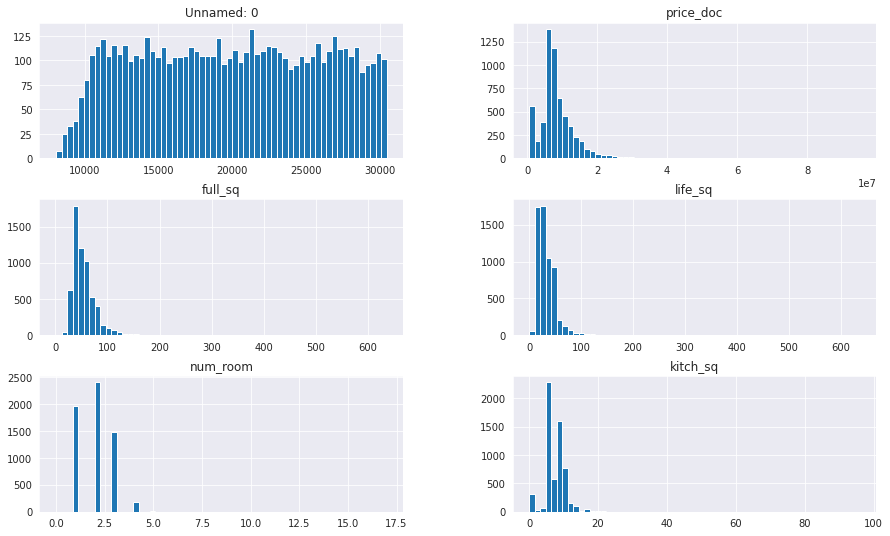

In [596]:
df.hist(bins=60, figsize=(15,9),color=None);plt.show()

Распределение переменных

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


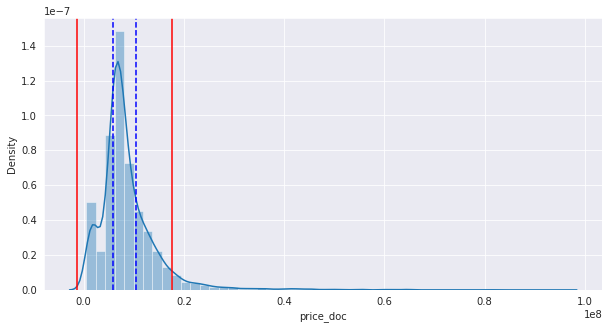

,Q1,Q3,IQR,low_outlier,high_outlier
0,5800000.0,10500000.0,4700000.0,-1250000.0,17550000.0


In [597]:
check_iqr(df.price_doc)

In [598]:
df['price_doc'] = subset_by_iqr(df.price_doc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


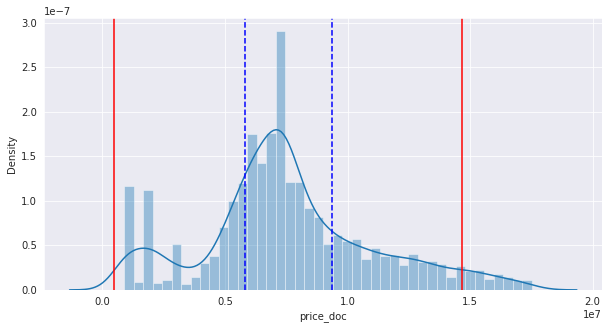

,Q1,Q3,IQR,low_outlier,high_outlier
0,5800000.0,9350000.0,3550000.0,475000.0,14675000.0


In [599]:
check_iqr(df.price_doc)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


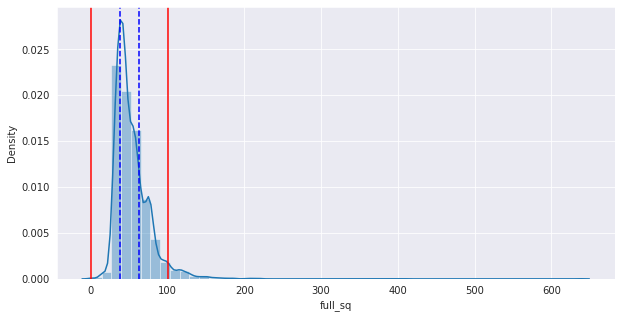

,Q1,Q3,IQR,low_outlier,high_outlier
0,38.0,63.0,25.0,0.5,100.5


In [600]:
check_iqr(df.full_sq)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


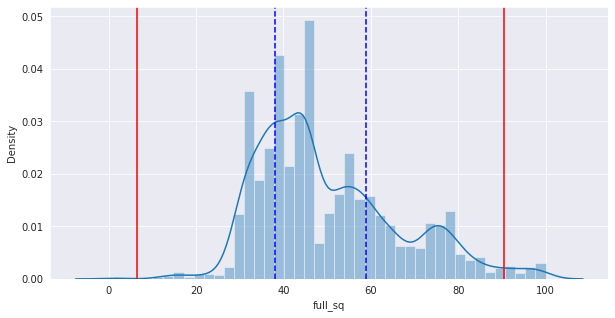

,Q1,Q3,IQR,low_outlier,high_outlier
0,38.0,59.0,21.0,6.5,90.5


In [601]:
df['full_sq'] = subset_by_iqr(df.full_sq)
check_iqr(df.full_sq)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


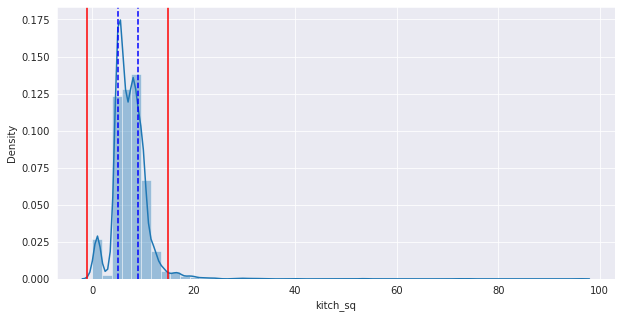

,Q1,Q3,IQR,low_outlier,high_outlier
0,5.0,9.0,4.0,-1.0,15.0


In [602]:
check_iqr(df.kitch_sq)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


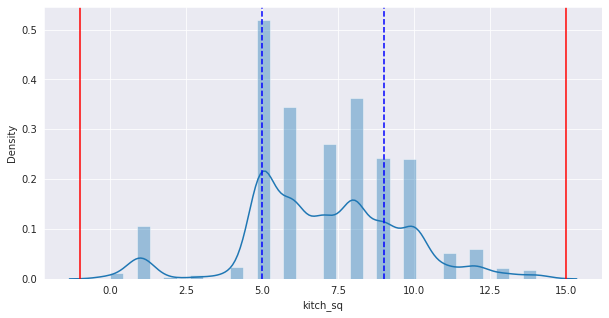

,Q1,Q3,IQR,low_outlier,high_outlier
0,5.0,9.0,4.0,-1.0,15.0


In [603]:
df['kitch_sq'] = subset_by_iqr(df.kitch_sq)
check_iqr(df.kitch_sq)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5628978250>, 2.0     2402
 1.0     1960
 3.0     1472
 4.0      180
 5.0       17
 6.0        4
 8.0        3
 7.0        1
 0.0        1
 17.0       1
 9.0        1
 Name: num_room, dtype: int64)

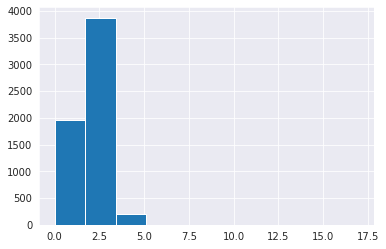

In [604]:
df.num_room.hist(), df.num_room.value_counts()

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5622f7c210>, 2.0    2402
 1.0    1960
 3.0    1472
 4.0     180
 5.0      17
 Name: num_room, dtype: int64)

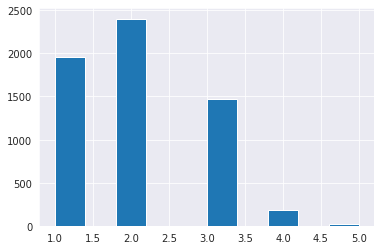

In [605]:

df = df.loc[(df.num_room > 0) & (df.num_room <= 5)]
df.num_room.hist(), df.num_room.value_counts()


In [606]:
#correlation matrix of train dataset
df_corr = df.copy()
corr = df_corr.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "8pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Heatmap")\
    .set_precision(2)\
    .set_table_styles(magnify())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,Unnamed: 0,price_doc,full_sq,life_sq,num_room,kitch_sq
Unnamed: 0,1.00,0.08,0.03,0.02,0.02,0.00
price_doc,0.08,1.00,0.51,0.30,0.40,0.25
full_sq,0.03,0.51,1.00,0.52,0.73,0.35
life_sq,0.02,0.30,0.52,1.00,0.59,0.09
num_room,0.02,0.40,0.73,0.59,1.00,0.16
kitch_sq,0.00,0.25,0.35,0.09,0.16,1.00


Исключим из датасета "лишние признаки"

In [607]:
df = df[['full_sq',	'num_room', 'kitch_sq',	'price_doc']]
df.head(3)

,full_sq,num_room,kitch_sq,price_doc
0,11.0,1.0,12.0,2750000.0
1,45.0,2.0,6.0,7100000.0
2,77.0,3.0,8.0,11700000.0


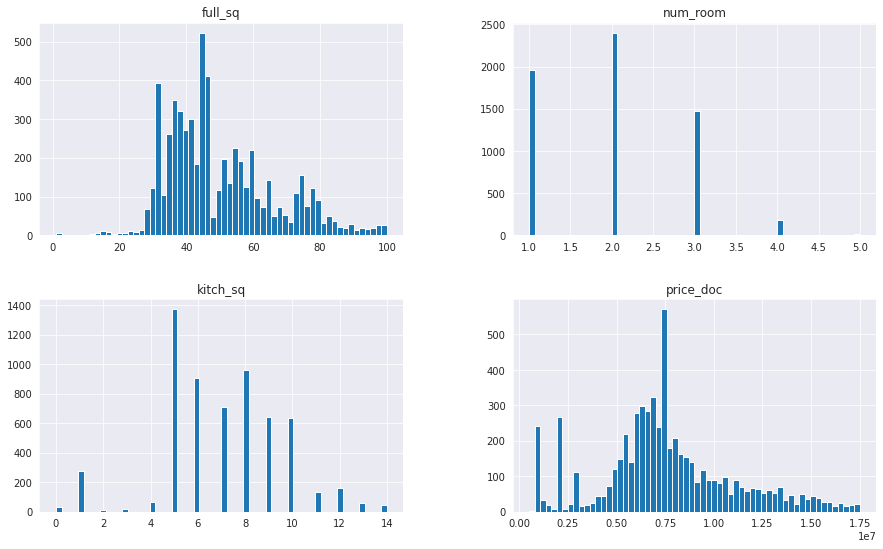

In [608]:
df.hist(bins=60, figsize=(15,9),color=None);plt.show()

In [609]:
#def norm_feature(feature):
  #return feature.apply(lambda x: np.log(x+1))

#df['price_log'] = norm_feature(df.price_doc)


Scaling target feature by 10 to get the model covergence.

In [610]:
df['price_doc'] = df.price_doc/10000000
df.head(3)

,full_sq,num_room,kitch_sq,price_doc
0,11.0,1.0,12.0,0.275
1,45.0,2.0,6.0,0.710
2,77.0,3.0,8.0,1.170


(0.05, 1.7516236)

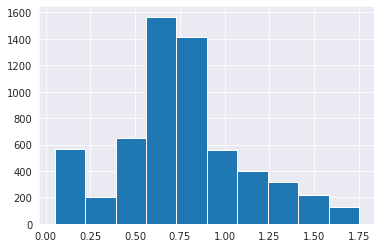

In [611]:
df.price_doc.hist()
df.price_doc.min(), df.price_doc.max()

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [kitch_sq, num_room, full_sq, Intercept]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 132 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


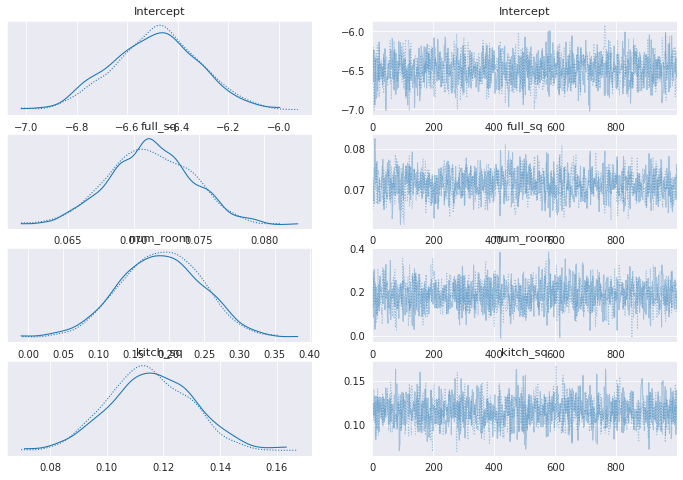

In [612]:
with pm.Model() as logistic_model:
    pm.glm.GLM.from_formula('price_doc ~ full_sq  + num_room + kitch_sq', df, family = pm.glm.families.Binomial())
    trace = pm.sample(1000)
    
az.plot_trace(trace);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 648x504 with 0 Axes>

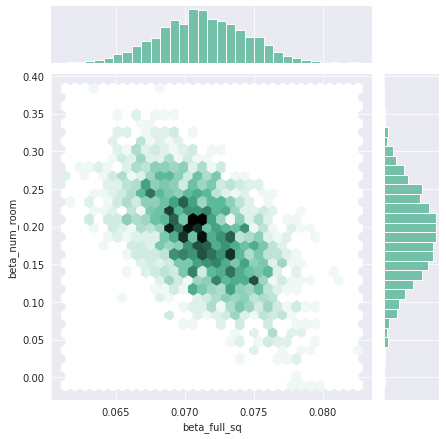

In [613]:
plt.figure(figsize=(9, 7))
sns.jointplot(trace["full_sq"], trace["num_room"], kind="hex", color="#4CB391")
plt.xlabel("beta_full_sq")
plt.ylabel("beta_num_room");

/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,
/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,
/usr/local/lib/python3.7/dist-packages/pymc3/plots/posteriorplot.py:62: DeprecationWarning: The `plot_posterior_predictive_glm` function will migrate to Arviz in a future release. 
Keep up to date with `ArviZ <https://arviz-devs.github.io/arviz/>`_ for future updates.
  DeprecationWarning,


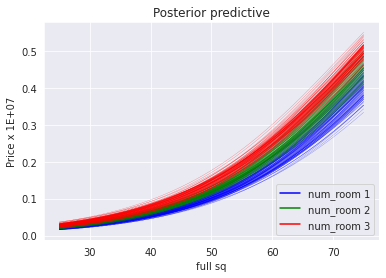

In [614]:
def lm_full(trace,full_sq,num_room,kitch_sq):
    shape = np.broadcast(full_sq,num_room,kitch_sq).shape
    x_norm = np.asarray([np.broadcast_to(x, shape) for x in [full_sq ,num_room,kitch_sq]])
    
    return 1 / (1 + np.exp(-(trace['Intercept'] + 
                             trace['full_sq']*x_norm[0] + 
                             trace['num_room']*(x_norm[1]) +
                             trace['kitch_sq']*x_norm[2])))

lm = lambda x, samples: lm_full(samples, x, 1., 5.)
lm2 = lambda x, samples: lm_full(samples, x, 2., 5.)
lm3 = lambda x, samples: lm_full(samples, x, 3., 5.)


pm.plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm, samples=100, color='blue', alpha=.8)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm2, samples=100, color='green', alpha=.8)
pm.plot_posterior_predictive_glm(trace, eval=np.linspace(25,75,1000), lm=lm3, samples=100, color='red', alpha=.8)

blue_line = matplotlib.lines.Line2D(["lm"], [], color="b", label="num_room 1")
green_line = matplotlib.lines.Line2D(["lm2"], [], color="g", label="num_room 2")
red_line = matplotlib.lines.Line2D(["lm3"], [], color="r", label="num_room 3")
plt.legend(handles=[blue_line, green_line, red_line], loc="lower right")
plt.ylabel("Price x 1E+07")
plt.xlabel("full sq")
plt.show();

In [615]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-6.487,0.176,-6.841,-6.186,0.005,0.004,1092.0,1279.0,1.0
full_sq,0.071,0.003,0.066,0.077,0.000,0.000,1019.0,1053.0,1.0
num_room,0.189,0.059,0.080,0.295,0.002,0.001,1284.0,1225.0,1.0
kitch_sq,0.116,0.015,0.089,0.145,0.000,0.000,1109.0,1044.0,1.0


In [616]:
df.columns

Index(['full_sq', 'num_room', 'kitch_sq', 'price_doc'], dtype='object')

Сравнение с логистической регрессией

In [617]:
df['price_doc'] = df.price_doc*10000000
df.head()

,full_sq,num_room,kitch_sq,price_doc
0,11.0,1.0,12.0,2750000.0
1,45.0,2.0,6.0,7100000.0
2,77.0,3.0,8.0,11700000.0
3,56.0,2.0,10.0,10400000.0
4,31.0,1.0,5.0,6200000.0


In [622]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(df[['full_sq', 'num_room', 'kitch_sq']], df['price_doc'])

ValueError: ignored